***
In this notebook i will be demonstarting Latent Dirichlet Allocation(LDA) for topic modelling. I will be using the Amazon fine food reviews dataset from Kaggle(https://www.kaggle.com/snap/amazon-fine-food-reviews) for performing LDA based topic modelling
I will be using the gensim package for LDA topic modelling and pyLDAvis for visualization of LDA topic model
***

In [114]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#!pip install spacy
#!pip install gensim
#!pip install pyLDAvis
#!pip install umap-learn[plot]

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
df= pd.read_csv("C:/Users/ASHISH YENKAR/Desktop/Topic-Modeling-main/data.csv")

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
df.head()

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Statement,Link,Date,Source,Label
0,“Nobody's ever seen a number like this… (33.1%...,https://www.politifact.com/factchecks/2020/oct...,ober 30^ 2020,Donald Trump,half-true
1,"Says President Donald Trump ""thinks that $15 a...",https://www.politifact.com/factchecks/2020/oct...,ober 30^ 2020,Joe Biden,half-true
2,“On 60 Minutes^ Joe said he never met with Hun...,https://www.politifact.com/factchecks/2020/oct...,ober 30^ 2020,Viral image,false
3,Says YouTube removed Tucker Carlson’s intervie...,https://www.politifact.com/factchecks/2020/oct...,ober 30^ 2020,Facebook posts,false
4,Says Jeff Foxworthy wrote a ‘fence test’ for R...,https://www.politifact.com/factchecks/2020/oct...,ober 30^ 2020,Facebook posts,false


In [118]:
df1=df['Statement']
sample_indices=df1.index

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
vectorizer1=CountVectorizer()
x1=vectorizer1.fit_transform(df1)

vectorizer2=TfidfVectorizer(stop_words=stop_words,use_idf=True,ngram_range=(1,3))
x2=vectorizer2.fit_transform(df['Statement'])

x1.todense()
x2.todense()

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [120]:
svd=TruncatedSVD(n_components=20) #,  n_iter=100
lsa_x1=svd.fit_transform(x1)

svd=TruncatedSVD(n_components=20) #,  n_iter=100
lsa_x2=svd.fit_transform(x2)

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
terms = vectorizer1.get_feature_names()

for i, comp in enumerate(svd.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: 
daca
 
family
 
democrats
 
dependent
 
dan
 
day
 
flexible
 
Topic 1: 
about
 
pay
 
penalized
 
pennsylvania
 
site
 
six
 
35
 
Topic 2: 
clint
 
said
 
name
 
says
 
com
 
conditions
 
counting
 
Topic 3: 
laptop
 
stood
 
support
 
cans
 
care
 
carlson
 
times
 
Topic 4: 
them
 
then
 
they
 
education
 
election
 
ended
 
disguising
 
Topic 5: 
for
 
forest
 
four
 
met
 
minimum
 
minutes
 
new
 
Topic 6: 
week
 
guaranteed
 
court
 
covid
 
cutting
 
has
 
have
 
Topic 7: 
obama
 
thing
 
thinks
 
this
 
voting
 
wage
 
wagner
 
Topic 8: 
be
 
because
 
been
 
ever
 
every
 
existing
 
help
 
Topic 9: 
visited
 
are
 
as
 
republican
 
republicans
 
results
 
speaker
 
Topic 10: 
said
 
by
 
california
 
called
 
ohio
 
on
 
or
 
Topic 11: 
said
 
by
 
california
 
called
 
ohio
 
on
 
or
 
Topic 12: 
2020
 
2018
 
000
 
ceo
 
chris
 
chumps
 
do
 
Topic 13: 
after
 
calls
 
massachusetts
 
may
 
meetings
 
obamacare
 
oct
 
Topic 14: 
ceo
 
chris
 
chumps
 
do
 
do

In [124]:
from sklearn.decomposition import TruncatedSVD
lsa_obj = TruncatedSVD(n_components=20, n_iter=100, random_state=42)
tfidf_lsa_data = lsa_obj.fit_transform(x2)
Sigma = lsa_obj.singular_values_
V_T = lsa_obj.components_.T

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

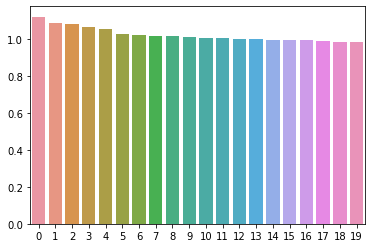

In [125]:
sns.barplot(x=list(range(len(Sigma))), y = Sigma)

In [127]:
term_topic_matrix = pd.DataFrame(data=lsa_term_topic, 
                                 index = eda_train.columns, 
                                 columns = [f'Latent_concept_{r}' for r in range(0,V_T.shape[1])])

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'lsa_term_topic' is not defined

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\umap\umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


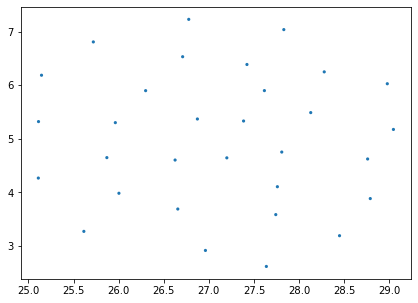

In [128]:


X_topics = svd.fit_transform(x1)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
#c = df1,
s = 10, # size
edgecolor='none'
)
plt.show()

In [80]:
import pandas as pd
topic_encoded_df=pd.DataFrame(lsa,columns=["topic_1","topic_2"])
topic_encoded_df["sentences"]=df1
topic_encoded_df["is_wild"]=df1

display(topic_encoded_df.iloc[sample_indices])
#display(topic_encoded_df[["df1","topic_1","topic_2"]])

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_1,topic_2,sentences,is_wild
0,0.029592,0.118795,“Nobody's ever seen number like this… (33.1%) ...,“Nobody's ever seen number like this… (33.1%) ...
1,0.648123,1.007852,"Says President Donald Trump ""thinks $15 hour m...","Says President Donald Trump ""thinks $15 hour m..."
2,0.319894,0.841565,“On 60 Minutes^ Joe said never met Hunter Buri...,“On 60 Minutes^ Joe said never met Hunter Buri...
3,0.271783,0.775388,Says YouTube removed Tucker Carlson’s intervie...,Says YouTube removed Tucker Carlson’s intervie...
4,0.270747,0.782136,Says Jeff Foxworthy wrote ‘fence test’ Republi...,Says Jeff Foxworthy wrote ‘fence test’ Republi...
5,0.592111,0.704169,“Joe Biden calls Pennsylvania voters don’t sup...,“Joe Biden calls Pennsylvania voters don’t sup...
6,0.555549,0.775022,Says Trump “didn’t campaign cutting debt” … “T...,Says Trump “didn’t campaign cutting debt” … “T...
7,-0.001188,0.009078,“I send every qualified person four-year colle...,“I send every qualified person four-year colle...
8,0.086720,0.207977,“The majority minimum wage workers...are mothe...,“The majority minimum wage workers...are mothe...
9,0.299676,0.891485,Says Dan Forest “missed almost half Board Educ...,Says Dan Forest “missed almost half Board Educ...


In [53]:
dictionary=vectorizer1.get_feature_names()


C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
dictionary

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['000',
 '10',
 '15',
 '150',
 '19',
 '2018',
 '2020',
 '30',
 '33',
 '35',
 '60',
 'act',
 'afford',
 'affordable',
 'ago',
 'aired',
 'alcohol',
 'almost',
 'ann',
 'are',
 'asked',
 'ballot',
 'ballots',
 'basis',
 'because',
 'believe',
 'benefits',
 'biden',
 'billion',
 'board',
 'bobulinski',
 'boone',
 'both',
 'boxes',
 'broken',
 'buildings',
 'burisma',
 'california',
 'called',
 'calls',
 'camera',
 'campaign',
 'can',
 'cans',
 'care',
 'carlson',
 'ceo',
 'chris',
 'chumps',
 'claim',
 'clear',
 'clint',
 'college',
 'columbia',
 'com',
 'conditions',
 'context',
 'couldn',
 'counted',
 'counting',
 'county',
 'court',
 'covid',
 'cutting',
 'daca',
 'dan',
 'day',
 'debt',
 'decision',
 'democrats',
 'dependent',
 'detroit',
 'didn',
 'disguising',
 'district',
 'do',
 'don',
 'donald',
 'double',
 'dreamers',
 'drivers',
 'drugs',
 'early',
 'earnings',
 'eastwood',
 'economic',
 'education',
 'election',
 'ended',
 'escorts',
 'essential',
 'even',
 'ever',
 'every',
 

In [59]:
encoding_matrix=pd.DataFrame(svd.components_,index=["topic_1","topic_2"],columns=dictionary).T
encoding_matrix

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_1,topic_2
000,0.337814,-0.176753
10,0.337814,-0.176753
15,0.022550,0.045247
150,-0.000248,0.000417
19,-0.000084,0.000431
...,...,...
year,-0.000248,0.000417
years,0.001009,0.003192
york,0.006832,0.019953
you,0.006832,0.019953


In [63]:
encoding_matrix['abc_topic_1']=np.abs(encoding_matrix['topic_1'])
encoding_matrix['abc_topic_2']=np.abs(encoding_matrix['topic_2'])
encoding_matrix.sort_values('abc_topic_2',ascending=False)

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_1,topic_2,abc_topic_1,abc_topic_2
says,0.203268,0.535172,0.203268,0.535172
joe,0.132614,0.283782,0.132614,0.283782
biden,0.332717,0.229336,0.332717,0.229336
10,0.337814,-0.176753,0.337814,0.176753
000,0.337814,-0.176753,0.337814,0.176753
...,...,...,...,...
college,-0.000248,0.000417,0.000248,0.000417
billion,-0.000248,0.000417,0.000248,0.000417
every,-0.000248,0.000417,0.000248,0.000417
state,-0.000248,0.000417,0.000248,0.000417


In [65]:
encoding_matrix.sort_values('abc_topic_1',ascending=False)

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_1,topic_2,abc_topic_1,abc_topic_2
000,0.337814,-0.176753,0.337814,0.176753
10,0.337814,-0.176753,0.337814,0.176753
biden,0.332717,0.229336,0.332717,0.229336
trump,0.211195,-0.008785,0.211195,0.008785
says,0.203268,0.535172,0.203268,0.535172
...,...,...,...,...
buildings,0.000022,0.004583,0.000022,0.004583
columbia,0.000022,0.004583,0.000022,0.004583
boone,0.000022,0.004583,0.000022,0.004583
county,0.000022,0.004583,0.000022,0.004583


In [67]:
import matplotlib.pyplot as plt

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


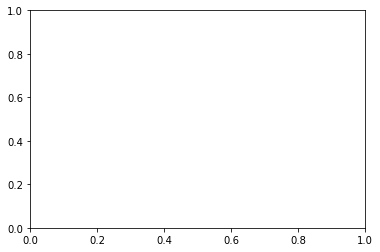

In [68]:
fig, ax=plt.subplots()

In [90]:
fig, ax=plt.subplots()
for val in topic_encoded_df.is_wild.unique():
    topic_1=topic_encoded_df[topic_encoded_df.is_wild==val]['topic_1'].values
    topic_2=topic_encoded_df[topic_encoded_df.is_wild==val]['topic_2'].values
    print(val)
    color="red" if val else "green"
    
    ax.scatter(topic_1,topic_2, c=color, alpha=0.3, label=label)
    ax.set_xlabel('first topic')
      ax.set_ylabel('second topic')
        ax.axvline(linewidth=0.5)
        ax.legend()
display(fig)

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndentationError: unexpected indent (<ipython-input-90-faf58b8dcb45>, line 9)

In [5]:
df1.head()

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    “Nobody's ever seen a number like this… (33.1%...
1    Says President Donald Trump "thinks that $15 a...
2    “On 60 Minutes^ Joe said he never met with Hun...
3    Says YouTube removed Tucker Carlson’s intervie...
4    Says Jeff Foxworthy wrote a ‘fence test’ for R...
Name: Statement, dtype: object

In [6]:
print(df.head(2))
print(len(df))

                                           Statement  \
0  “Nobody's ever seen a number like this… (33.1%...   
1  Says President Donald Trump "thinks that $15 a...   

                                                Link           Date  \
0  https://www.politifact.com/factchecks/2020/oct...  ober 30^ 2020   
1  https://www.politifact.com/factchecks/2020/oct...  ober 30^ 2020   

         Source      Label  
0  Donald Trump  half-true  
1     Joe Biden  half-true  
31


C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
import nltk
nltk.download('stopwords') # run this one time

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

***
Let us pre-process the data
***

In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df['Statement']=df['Statement'].apply(remove_stopwords)



C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
import spacy


C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
!python -m spacy download en_core_web_sm

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
 
text_list=df['Statement'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Says President Donald Trump "thinks $15 hour minimum wage much essential workers."
['hour', 'minimum', 'wage', 'much', 'essential', 'worker']


***
Create vocabulary dictionary and document term matrix
***

In [51]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
dictionary

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
!pip install -U scikit-learn

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
vectorizer2=TfidfVectorizer(stop_words=stop_words,use_idf=True,ngram_range=(1,3))
X=vectorizer.fit_transform(df['Statement'])

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
print (X)

  (0, 311)	0.16761639940699766
  (0, 675)	0.16761639940699766
  (0, 293)	0.16761639940699766
  (0, 314)	0.16761639940699766
  (0, 226)	0.16761639940699766
  (0, 28)	0.16761639940699766
  (0, 401)	0.16761639940699766
  (0, 468)	0.16761639940699766
  (0, 601)	0.16761639940699766
  (0, 249)	0.16761639940699766
  (0, 465)	0.16761639940699766
  (0, 258)	0.16761639940699766
  (0, 310)	0.16761639940699766
  (0, 674)	0.16761639940699766
  (0, 292)	0.16761639940699766
  (0, 313)	0.16761639940699766
  (0, 225)	0.16761639940699766
  (0, 27)	0.16761639940699766
  (0, 400)	0.16761639940699766
  (0, 467)	0.16761639940699766
  (0, 600)	0.16761639940699766
  (0, 248)	0.16761639940699766
  (0, 464)	0.16761639940699766
  (0, 256)	0.16761639940699766
  (0, 257)	0.16761639940699766
  :	:
  (30, 368)	0.15855131943534528
  (30, 160)	0.15855131943534528
  (30, 370)	0.15855131943534528
  (30, 138)	0.15855131943534528
  (30, 24)	0.15855131943534528
  (30, 476)	0.15855131943534528
  (30, 21)	0.15855131943534528

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
x.shape

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(31, 278)

In [24]:
svd=TruncatedSVD(n_components=2,  n_iter=100)
lsa=svd.fit_transform(x)

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
lsa[0]

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.02333984, 0.11434606])

In [30]:
import pandas as pd
topic_encoded_df=pd.DataFrame(lsa,columns=["topic_1","topic_2"])
topic_encoded_df["df1"]=df1
display(topic_encoded_df[["df1","topic_1","topic_2"]])

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,df1,topic_1,topic_2
0,“Nobody's ever seen number like this… (33.1%) ...,0.023340,0.114346
1,"Says President Donald Trump ""thinks $15 hour m...",0.650797,1.001971
2,“On 60 Minutes^ Joe said never met Hunter Buri...,0.314660,0.836755
3,Says YouTube removed Tucker Carlson’s intervie...,0.270304,0.779939
4,Says Jeff Foxworthy wrote ‘fence test’ Republi...,0.270497,0.788056
5,“Joe Biden calls Pennsylvania voters don’t sup...,0.594233,0.705203
6,Says Trump “didn’t campaign cutting debt” … “T...,0.554966,0.785037
7,“I send every qualified person four-year colle...,0.013158,0.012978
8,“The majority minimum wage workers...are mothe...,0.090125,0.200576
9,Says Dan Forest “missed almost half Board Educ...,0.304219,0.895917


In [31]:
dictionary=vectorizer.get_feature_names()
dictionary

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['000',
 '10',
 '15',
 '150',
 '19',
 '2018',
 '2020',
 '30',
 '33',
 '35',
 '60',
 'act',
 'afford',
 'affordable',
 'ago',
 'aired',
 'alcohol',
 'almost',
 'ann',
 'are',
 'asked',
 'ballot',
 'ballots',
 'basis',
 'because',
 'believe',
 'benefits',
 'biden',
 'billion',
 'board',
 'bobulinski',
 'boone',
 'both',
 'boxes',
 'broken',
 'buildings',
 'burisma',
 'california',
 'called',
 'calls',
 'camera',
 'campaign',
 'can',
 'cans',
 'care',
 'carlson',
 'ceo',
 'chris',
 'chumps',
 'claim',
 'clear',
 'clint',
 'college',
 'columbia',
 'com',
 'conditions',
 'context',
 'couldn',
 'counted',
 'counting',
 'county',
 'court',
 'covid',
 'cutting',
 'daca',
 'dan',
 'day',
 'debt',
 'decision',
 'democrats',
 'dependent',
 'detroit',
 'didn',
 'disguising',
 'district',
 'do',
 'don',
 'donald',
 'double',
 'dreamers',
 'drivers',
 'drugs',
 'early',
 'earnings',
 'eastwood',
 'economic',
 'education',
 'election',
 'ended',
 'escorts',
 'essential',
 'even',
 'ever',
 'every',
 

In [47]:
terms=vectorizer.get_feature_names()
for i, comp in enumerate(lsa.components_):
    termsIncomp=zip(terms, comp)
    sortedTerms=sorted(termsIncomp, key=lambda x:x[1], reverse=True)[:10]
    print ("Concept %d:" % i )
    for term in sortedTerms:
        print (term[0])
        print (" ")

Concept 0:
biden
 
joe
 
says
 
joe biden
 
said
 
called
 
hunter
 
biden license
 
biden license plate
 
joe biden license
 
Concept 1:
minimum
 
minimum wage
 
wage
 
workers
 
majority
 
majority minimum
 
majority minimum wage
 
minimum wage workers
 
mothers
 
wage workers
 
Concept 2:
ballots
 
election
 
day
 
election day
 
laws
 
voting
 
protecting
 
ballots weeks
 
ballots weeks election
 
believe
 
Concept 3:
jacobs
 
conditions
 
existing
 
existing conditions
 
pre
 
pre existing
 
pre existing conditions
 
times
 
ann
 
ann wagner
 
Concept 4:
harris
 
kamala
 
kamala harris
 
said
 
feeding
 
feeding hungry
 
feeding hungry kids
 
harris said
 
harris said looters
 
hungry
 
Concept 5:
campaign
 
says
 
campaign cutting
 
campaign cutting debt
 
cutting
 
cutting debt
 
cutting debt promised
 
debt
 
debt promised
 
promised
 
Concept 6:
get
 
care
 
health
 
benefits
 
benefits personal
 
benefits personal protections
 
care benefits
 
care benefits personal
 
drivers

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
lda_model.print_topics()

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.057*"state" + 0.057*"%" + 0.057*"act^" + 0.057*"affordable" + 0.057*"folk" + 0.057*"staff" + 0.057*"camera" + 0.057*"court" + 0.005*"personal" + 0.005*"flexible"'),
 (1,
  '0.047*"time" + 0.047*"pre" + 0.047*"condition" + 0.047*"-" + 0.047*"taxis" + 0.047*"inheritance" + 0.047*"basis" + 0.047*"meeting" + 0.047*"voter" + 0.047*"pandemic"'),
 (2,
  '0.050*"test" + 0.050*"year" + 0.050*"drug" + 0.050*"people" + 0.050*"alcohol" + 0.050*"dependent" + 0.050*"low" + 0.050*"building" + 0.050*"school" + 0.050*"campaign"'),
 (3,
  '0.060*"health" + 0.060*"family" + 0.060*"theft" + 0.060*"other" + 0.060*"insurance^" + 0.060*"trump" + 0.060*"free" + 0.005*"earnings^" + 0.005*"flexible" + 0.005*"care"'),
 (4,
  '0.077*"looter" + 0.077*"hungry" + 0.077*"kid" + 0.007*"earnings^" + 0.007*"folk" + 0.007*"care" + 0.007*"driver" + 0.007*"act^" + 0.007*"protections^" + 0.007*"schedule"'),
 (5,
  '0.073*"ballot" + 0.026*"week" + 0.026*"flexible" + 0.026*"schedule" + 0.026*"protections^" + 0.026*"

In [13]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.180588 -0.076838       1        1  26.979632
5     -0.151685 -0.119760       2        1  21.501939
9     -0.002677  0.118472       3        1   8.923225
2     -0.030574  0.076248       4        1   8.329797
1      0.059281 -0.018118       5        1   8.304550
8     -0.057538  0.006982       6        1   7.647974
0      0.002431  0.006705       7        1   6.637886
3     -0.011360  0.012258       8        1   6.416921
4      0.005148  0.003810       9        1   3.481310
7      0.006386 -0.009760      10        1   1.776766, topic_info=         Term     Freq     Total Category  logprob  loglift
33     voting  1.00000  1.000000  Default  30.0000  30.0000
29     ballot  2.00000  2.000000  Default  29.0000  29.0000
15       test  1.00000  1.000000  Default  28.0000  28.0000
47     hungry  0.00000  0.000000  Default  27.0000  27.0000
49     looter  0.00000  0.000000  Default  26.0000  26.0000
..        ...      ...       ...      ...      ...      ...
22  qualified  0.02094  1.153705  Topic10  -4.7185   0.0213
23      state  0.02094  1.610056  Topic10  -4.7185  -0.3120
24       year  0.02094  1.648988  Topic10  -4.7185  -0.3359
25   majority  0.02094  1.190557  Topic10  -4.7185  -0.0101
26     mother  0.02094  1.190557  Topic10  -4.7185  -0.0101

[486 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.607198       %
0         7  0.607198       %
42        1  0.601303       -
42        5  0.601303       -
71        7  1.066681    act^
...     ...       ...     ...
38        1  0.536732    week
38        2  0.536732    week
12        1  0.526319  worker
24        2  0.606433    year
24        4  0.606433    year

[123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 10, 3, 2, 9, 1, 4, 5, 8])

In [14]:

print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -4.578825071234323

Coherence Score:  0.4981899095338174


***
Method to find optimal number of topics
Code from:https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#14computemodelperplexityandcoherencescore
***

In [48]:


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


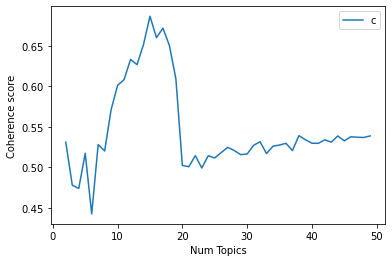

In [50]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores


In [51]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.531
Num Topics = 3  has Coherence Value of 0.4779
Num Topics = 4  has Coherence Value of 0.4738
Num Topics = 5  has Coherence Value of 0.5172
Num Topics = 6  has Coherence Value of 0.4424
Num Topics = 7  has Coherence Value of 0.528
Num Topics = 8  has Coherence Value of 0.5201
Num Topics = 9  has Coherence Value of 0.5711
Num Topics = 10  has Coherence Value of 0.6011
Num Topics = 11  has Coherence Value of 0.6082
Num Topics = 12  has Coherence Value of 0.633
Num Topics = 13  has Coherence Value of 0.6266
Num Topics = 14  has Coherence Value of 0.6515
Num Topics = 15  has Coherence Value of 0.6863
Num Topics = 16  has Coherence Value of 0.6599
Num Topics = 17  has Coherence Value of 0.6716
Num Topics = 18  has Coherence Value of 0.6502
Num Topics = 19  has Coherence Value of 0.6092
Num Topics = 20  has Coherence Value of 0.5022
Num Topics = 21  has Coherence Value of 0.5007
Num Topics = 22  has Coherence Value of 0.5143
Num Topics = 23  has Coh

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.044*"state" + 0.044*"%" + 0.044*"act^" + 0.044*"affordable" + 0.044*"dependent" + 0.044*"people" + 0.044*"drug" + 0.044*"folk" + 0.044*"alcohol" + 0.044*"laptop"'),
 (1,
  '0.054*"week" + 0.054*"year" + 0.028*"great" + 0.028*"%" + 0.028*"growth" + 0.028*"time" + 0.028*"election" + 0.028*"expert" + 0.028*"law" + 0.028*"economic"'),
 (2,
  '0.045*"incompetent^" + 0.045*"lying^" + 0.045*"double" + 0.045*"insincere^" + 0.045*"flip" + 0.045*"talking^" + 0.045*"socialist" + 0.045*"flopping^" + 0.045*"radical" + 0.045*"taxis"'),
 (3,
  '0.068*"do" + 0.068*"chump" + 0.068*"voter" + 0.068*"debt" + 0.007*"interview" + 0.007*"ballot" + 0.007*"test" + 0.007*"important" + 0.007*"pandemic" + 0.007*"voting"'),
 (4,
  '0.064*"ballot" + 0.064*"major" + 0.064*"right" + 0.064*"voting" + 0.064*"decision" + 0.006*"interview" + 0.006*"debt" + 0.006*"test" + 0.006*"meeting" + 0.006*"time"'),
 (5,
  '0.057*"time" + 0.057*"pre" + 0.057*"-" + 0.057*"staff" + 0.057*"condition" + 0.057*"camera" + 0.057*

In [53]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.197857 -0.016457       1        1  21.204797
1     -0.067403  0.149429       2        1  18.798562
6     -0.097953 -0.136986       3        1  15.213728
8      0.003145  0.031114       4        1  10.164430
2     -0.000102 -0.022507       5        1   9.815087
0     -0.023184  0.043363       6        1   9.575206
5     -0.026839 -0.033531       7        1   6.102991
4      0.005355 -0.012388       8        1   5.130815
3      0.009123 -0.002038       9        1   3.994383, topic_info=          Term      Freq     Total Category  logprob  loglift
29      ballot  2.000000  2.000000  Default   30.000  30.0000
6         time  2.000000  2.000000  Default   29.000  29.0000
33      voting  1.000000  1.000000  Default   28.000  28.0000
44         pre  1.000000  1.000000  Default   27.000  27.0000
42           -  1.000000  1.000000  Default   26.000  26.0000
..         ...       ...       ...      ...      ...      ...
43   condition  0.035634  1.540985   Topic9   -4.997  -0.5466
11        wage  0.035633  1.796306   Topic9   -4.997  -0.6999
42           -  0.035633  1.540976   Topic9   -4.997  -0.5466
38        week  0.035633  1.765939   Topic9   -4.997  -0.6829
102  signature  0.035633  1.126667   Topic9   -4.997  -0.2335

[404 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         2  0.612148           %
0         6  0.612148           %
42        3  0.648939           -
71        6  0.995537        act^
72        6  0.995537  affordable
...     ...       ...         ...
33        1  0.649258      voting
11        1  0.556698        wage
38        2  0.566271        week
12        1  0.556689      worker
24        2  0.566277        year

[110 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 7, 9, 3, 1, 6, 5, 4])